
# <a href="https://www.kaggle.com/datasets/samanemami/market-research-survey">Market Research Survey Dataset</a>


## Survey Questions and Response Key			
			
#### 1) What is your yearly salary, not including bonuses?			
Respondents enter numeric value			
			
#### 2) What is your age?			
Respondents enter numeric value			
			
#### 3) What is the highest level of education you have obtained?			
Respondents select from the following 5 choices:			
Value 	Description		
0	Less than High School Degree		
1	High School Degree		
2	Some College		
3	4-Year College Degree		
4	Master's, Doctoral or Professional Degree		
			
#### 4) What is the make of your primary car?			
Respondents select from the following 20 choices:			
Value 	Description		
1	BMW		
2	Buick		
3	Cadillac		
4	Chevrolet		
5	Chrysler		
6	Dodge		
7	Ford		
8	Honda		
9	Hyundai		
10	Jeep		
11	Kia		
12	Lincoln		
13	Mazda		
14	Mercedes Benz		
15	Mitsubishi		
16	Nissan		
17	Ram		
18	Subaru		
19	Toyota		
20	None of the above		
			
#### 5) What is your zip code?			
Respondents enter zip code, which is captured as 1 of the following 9 regions in the U.S.			
Value	Region		
0	New England		
1	Mid-Atlantic		
2	East North Central		
3	West North Central		
4	South Atlantic		
5	East South Central		
6	West South Central		
7	Mountain		
8	Pacific		
			
#### 6) What amount of credit is available to you?			
Respondents enter numeric value			
			
#### 7) Which brand of computers do you prefer?			
Respondents select from the following 2 choices:			
Value 	Description		
0	Acer		
1	Sony		

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
#download dataset from: https://www.kaggle.com/datasets/samanemami/market-research-survey
df = pd.read_csv('..\Data Science Projects/CompleteResponses.csv')

In [3]:
df.head().T

,0,1,2,3,4
salary,119806.5448,106880.47840,78020.75094,63689.93635,50873.6188
age,45.0000,63.00000,23.00000,51.00000,20.0000
elevel,0.0000,1.00000,0.00000,3.00000,3.0000
car,14.0000,11.00000,15.00000,6.00000,14.0000
zipcode,4.0000,6.00000,2.00000,5.00000,4.0000
credit,442037.7113,45007.17883,48795.32279,40888.87736,352951.4977
brand,0.0000,1.00000,0.00000,1.00000,0.0000


In [4]:
df.describe()

,salary,age,elevel,car,zipcode,credit,brand
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,84870.862257,49.778642,1.982926,10.521924,4.040816,249175.966620,0.621742
std,37712.340836,17.596685,1.420562,5.771435,2.582058,145211.572531,0.484977
min,20000.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,52082.106040,35.000000,1.000000,6.000000,2.000000,120806.813900,0.000000
50%,84949.735155,50.000000,2.000000,11.000000,4.000000,250607.146100,1.000000
75%,117162.043375,65.000000,3.000000,15.750000,6.000000,374639.701800,1.000000
max,150000.000000,80.000000,4.000000,20.000000,8.000000,500000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   9898 non-null   float64
 1   age      9898 non-null   int64  
 2   elevel   9898 non-null   int64  
 3   car      9898 non-null   int64  
 4   zipcode  9898 non-null   int64  
 5   credit   9898 non-null   float64
 6   brand    9898 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 541.4 KB


In [6]:
df.nunique()

salary     9656
age          61
elevel        5
car          20
zipcode       9
credit     9652
brand         2
dtype: int64

<AxesSubplot:title={'center':'Heatmap Correlation'}>

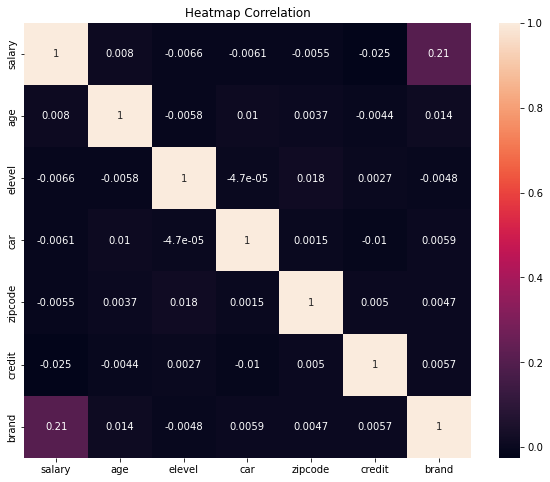

In [7]:
#check correlation using heatmap
plt.figure(figsize=(10,8))
cor = df.corr() 
plt.title('Heatmap Correlation')
sns.heatmap(cor, annot = True) 

In [8]:
#transform data
df['Elevel']=df['elevel'].replace({0:'Less than High School Degree', 1:'High School Degree', 2:'Some College', 3:'4-Year College Degree', 4:'Masters, Doctoral or Professional Degree'})
df['Car']=df['car'].replace({1:'BMW', 2:'Buick', 3:'Cadillac', 4:'Chevrolet', 5:'Chrysler', 6:'Dodge', 7:'Ford', 8:'Honda', 9:'Hyundai', 10:'Jeep', 11:'Kia', 12:'Lincoln', 13:'Mazda', 14:'Mercedes Benz', 15:'Mitsubishi', 16:'Nissan', 17:'Ram', 18:'Subaru', 19:'Toyota', 20:'None of the above'})
df['Zipcode']=df['zipcode'].replace({0:'New England', 1:'Mid-Atlantic', 2:'East North Central', 3:'West North Central', 4:'South Atlantic', 5:'East South Central', 6:'West South Central', 7:'Mountain', 8:'Pacific'})
df['Brand']=df['brand'].replace({0:'Acer', 1:'Sony'})

In [9]:
df['Elevel'].value_counts()

Less than High School Degree                2052
Some College                                1983
Masters, Doctoral or Professional Degree    1968
High School Degree                          1948
4-Year College Degree                       1947
Name: Elevel, dtype: int64

In [10]:
df['Car'].value_counts()

Mitsubishi           542
Subaru               524
Honda                511
Buick                509
Ram                  508
Chrysler             505
Jeep                 500
Lincoln              498
Ford                 495
Mercedes Benz        494
BMW                  492
Toyota               489
Cadillac             488
Hyundai              487
None of the above    484
Chevrolet            479
Dodge                477
Kia                  473
Mazda                473
Nissan               470
Name: Car, dtype: int64

In [11]:
df['Zipcode'].value_counts()

West South Central    1155
Pacific               1135
East North Central    1112
East South Central    1108
South Atlantic        1087
New England           1085
Mountain              1083
West North Central    1080
Mid-Atlantic          1053
Name: Zipcode, dtype: int64

In [12]:
df['Brand'].value_counts()

Sony    6154
Acer    3744
Name: Brand, dtype: int64

<AxesSubplot:title={'center':'Education Level'}, xlabel='Elevel', ylabel='count'>

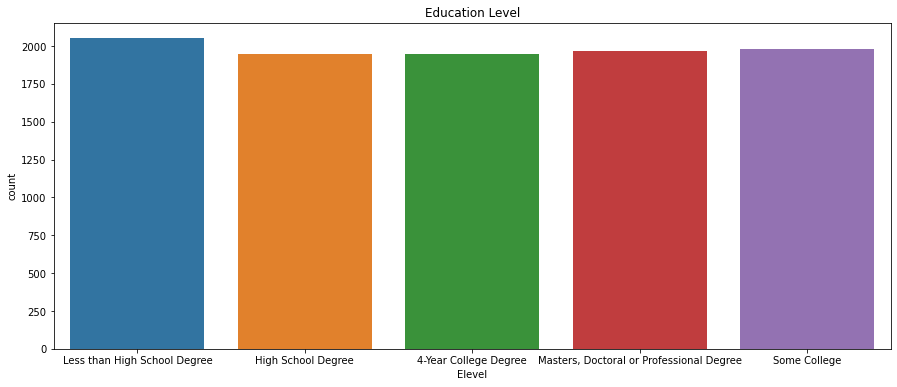

In [13]:
#visualize elevel
plt.figure(figsize = (15,6))
plt.title("Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
sns.countplot(x=df.Elevel)

<AxesSubplot:title={'center':'Brand of Car'}, xlabel='Car', ylabel='count'>

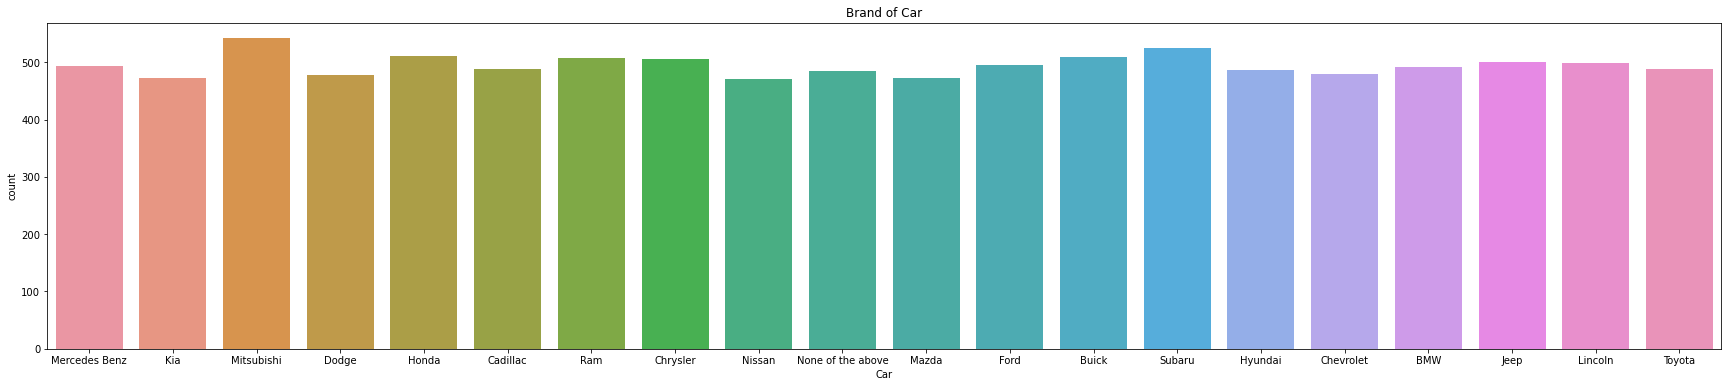

In [14]:
#visualize brand of car
plt.figure(figsize = (30,6))
plt.title("Brand of Car")
plt.xlabel("Car")
plt.ylabel("Count")
sns.countplot(x=df.Car)

<AxesSubplot:title={'center':'Zipcode'}, xlabel='Zipcode', ylabel='count'>

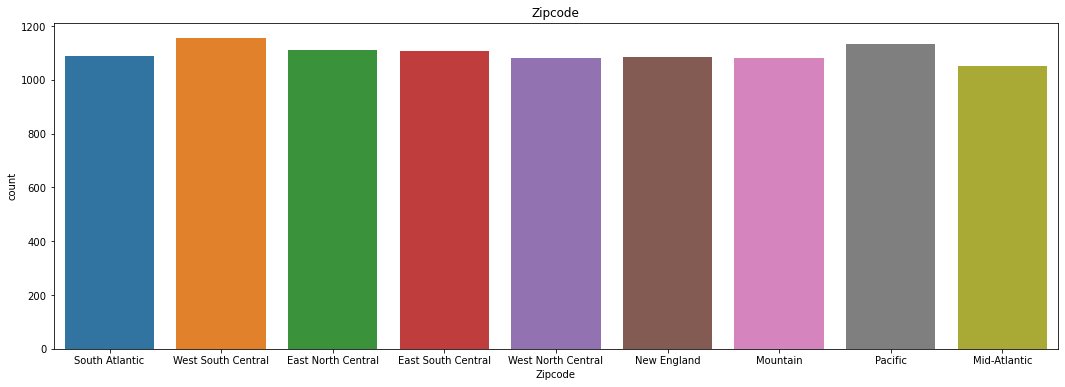

In [15]:
#visualize zipcode
plt.figure(figsize = (18,6))
plt.title("Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Count")
sns.countplot(x=df.Zipcode)

<AxesSubplot:title={'center':'Computer Brand'}, xlabel='Brand', ylabel='count'>

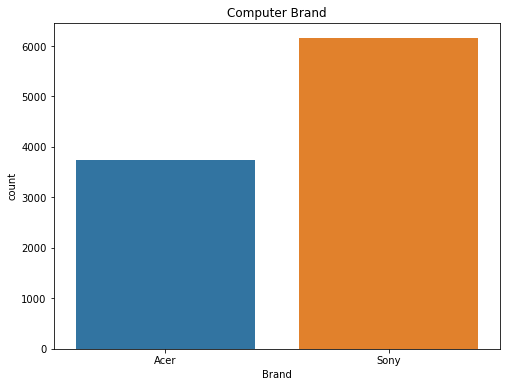

In [33]:
#visualize brand of market
plt.figure(figsize = (8,6))
plt.title("Computer Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
sns.countplot(x=df.Brand)

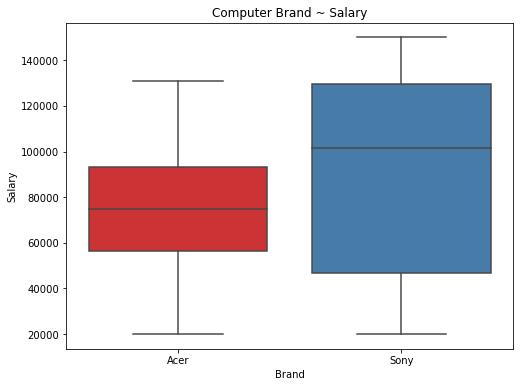

In [17]:
#visualize computer brand ~ salary
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Brand', y = 'salary', palette = 'Set1')
plt.title("Computer Brand ~ Salary")
plt.xlabel("Brand")
plt.ylabel("Salary")
plt.show()

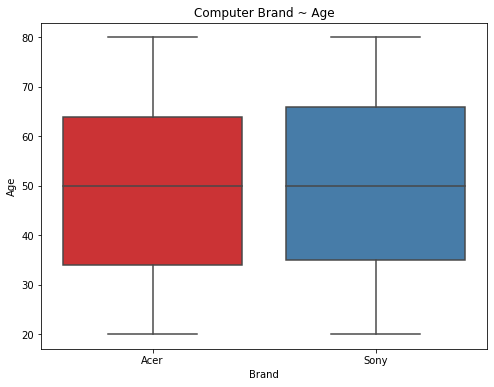

In [18]:
#visualize computer brand ~ age
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Brand', y = 'age', palette = 'Set1')
plt.title("Computer Brand ~ Age")
plt.xlabel("Brand")
plt.ylabel("Age")
plt.show()

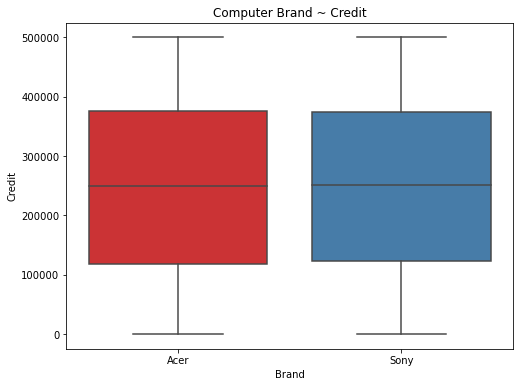

In [19]:
#visualize computer brand ~ credit
plt.figure(figsize = (8,6))
sns.boxplot(data = df, x = 'Brand', y = 'credit', palette = 'Set1')
plt.title("Computer Brand ~ Credit")
plt.xlabel("Brand")
plt.ylabel("Credit")
plt.show()

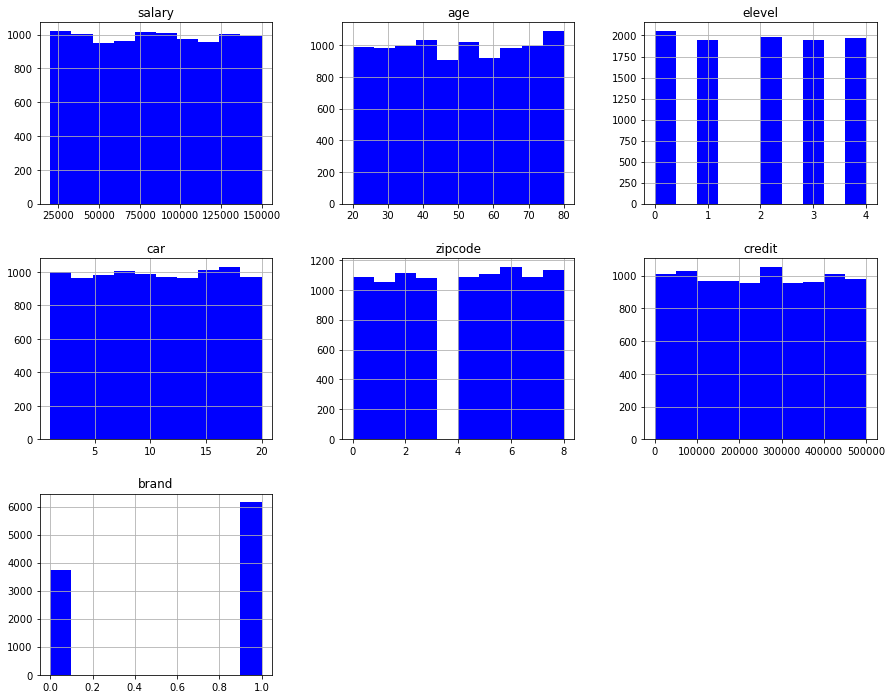

In [20]:
#visualize histogram of each attribute
df.hist(figsize = (15,12), color = 'blue')
plt.show()

In [21]:
df.drop(['Elevel','Car','Zipcode','brand'], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
salary,119806.5448,106880.4784,78020.75094,63689.93635,50873.6188
age,45,63,23,51,20
elevel,0,1,0,3,3
car,14,11,15,6,14
zipcode,4,6,2,5,4
credit,442037.7113,45007.17883,48795.32279,40888.87736,352951.4977
Brand,Acer,Sony,Acer,Sony,Acer


In [22]:
#split data
X = df.drop('Brand', axis = 1)
y = df['Brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#encode data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
RFmodel = RandomForestClassifier(random_state=42)
RFmodel.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [24]:
RFy_pred = RFmodel.predict(X_test_scaled)
RFaccuracy = accuracy_score(y_test, RFy_pred)
print("Random Forest Accuracy:", RFaccuracy)
print(classification_report(y_test, RFy_pred))

Random Forest Accuracy: 0.9222222222222223
              precision    recall  f1-score   support

        Acer       0.89      0.91      0.90       756
        Sony       0.94      0.93      0.94      1224

    accuracy                           0.92      1980
   macro avg       0.92      0.92      0.92      1980
weighted avg       0.92      0.92      0.92      1980



In [25]:
RFfeature_importance = RFmodel.feature_importances_
RFfeature_names = X.columns
RFfeature_importance_df = pd.DataFrame({'Feature': RFfeature_names, 'Importance': RFfeature_importance})
RFfeature_importance_df = RFfeature_importance_df.sort_values(by='Importance', ascending=False)
print(RFfeature_importance_df)

   Feature  Importance
0   salary    0.518515
1      age    0.280803
5   credit    0.089863
3      car    0.049117
4  zipcode    0.035840
2   elevel    0.025862


In [26]:
RFtop_features = RFfeature_importance_df['Feature'].head(3).tolist()
print("Random Forest Top features:", RFtop_features)

Random Forest Top features: ['salary', 'age', 'credit']


[[ 685   71]
 [  83 1141]]


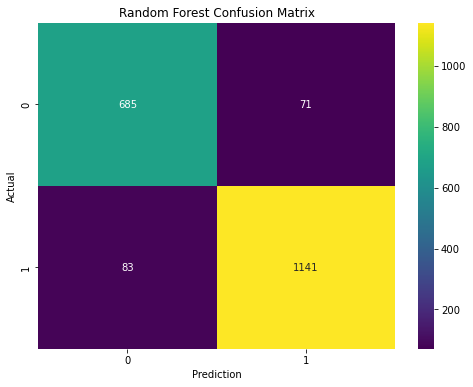

In [27]:
#confusion matrix
RFmatrix = metrics.confusion_matrix(y_test, RFy_pred)
print(RFmatrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(RFmatrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [28]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [29]:
y_pred = XGBmodel.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred)
XGBaccuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", XGBaccuracy)
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9085858585858586
              precision    recall  f1-score   support

        Acer       0.88      0.87      0.88       756
        Sony       0.92      0.93      0.93      1224

    accuracy                           0.91      1980
   macro avg       0.90      0.90      0.90      1980
weighted avg       0.91      0.91      0.91      1980



In [30]:
XGBfeature_importance = XGBmodel.feature_importances_
XGBfeature_names = X.columns
XGBfeature_importance_df = pd.DataFrame({'Feature': XGBfeature_names, 'Importance': XGBfeature_importance})
XGBfeature_importance_df = XGBfeature_importance_df.sort_values(by='Importance', ascending=False)
print(XGBfeature_importance_df)

   Feature  Importance
1      age    0.516372
0   salary    0.328897
5   credit    0.043587
3      car    0.037742
2   elevel    0.037214
4  zipcode    0.036188


In [31]:
XGBtop_features = XGBfeature_importance_df['Feature'].head(3).tolist()
print("XGBoost Top features:", XGBtop_features)

XGBoost Top features: ['age', 'salary', 'credit']


[[ 661   95]
 [  86 1138]]


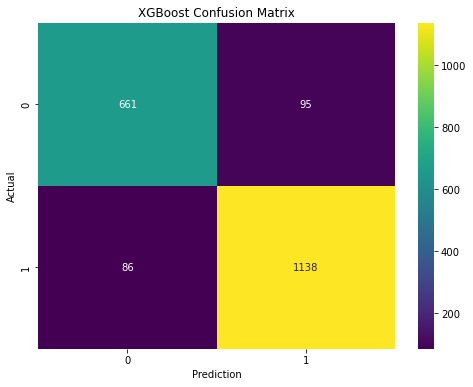

In [32]:
#confusion matrix
XGBmatrix = metrics.confusion_matrix(y_test, y_pred)
print(XGBmatrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(XGBmatrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

## Conclusions
* ### Random Forest model performs slightly better than XGBoost model, although, both models performed very well.
* ### The top 3 features in determining preferred computer brand are Age, Salary, and Credit. 
* ### Age and Salary were the most dominate features.